In [50]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#cross validation imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import sem

#Model imports
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(np.c_[data['data'], data['target']])
df.columns = list(data['feature_names']) + ['target']

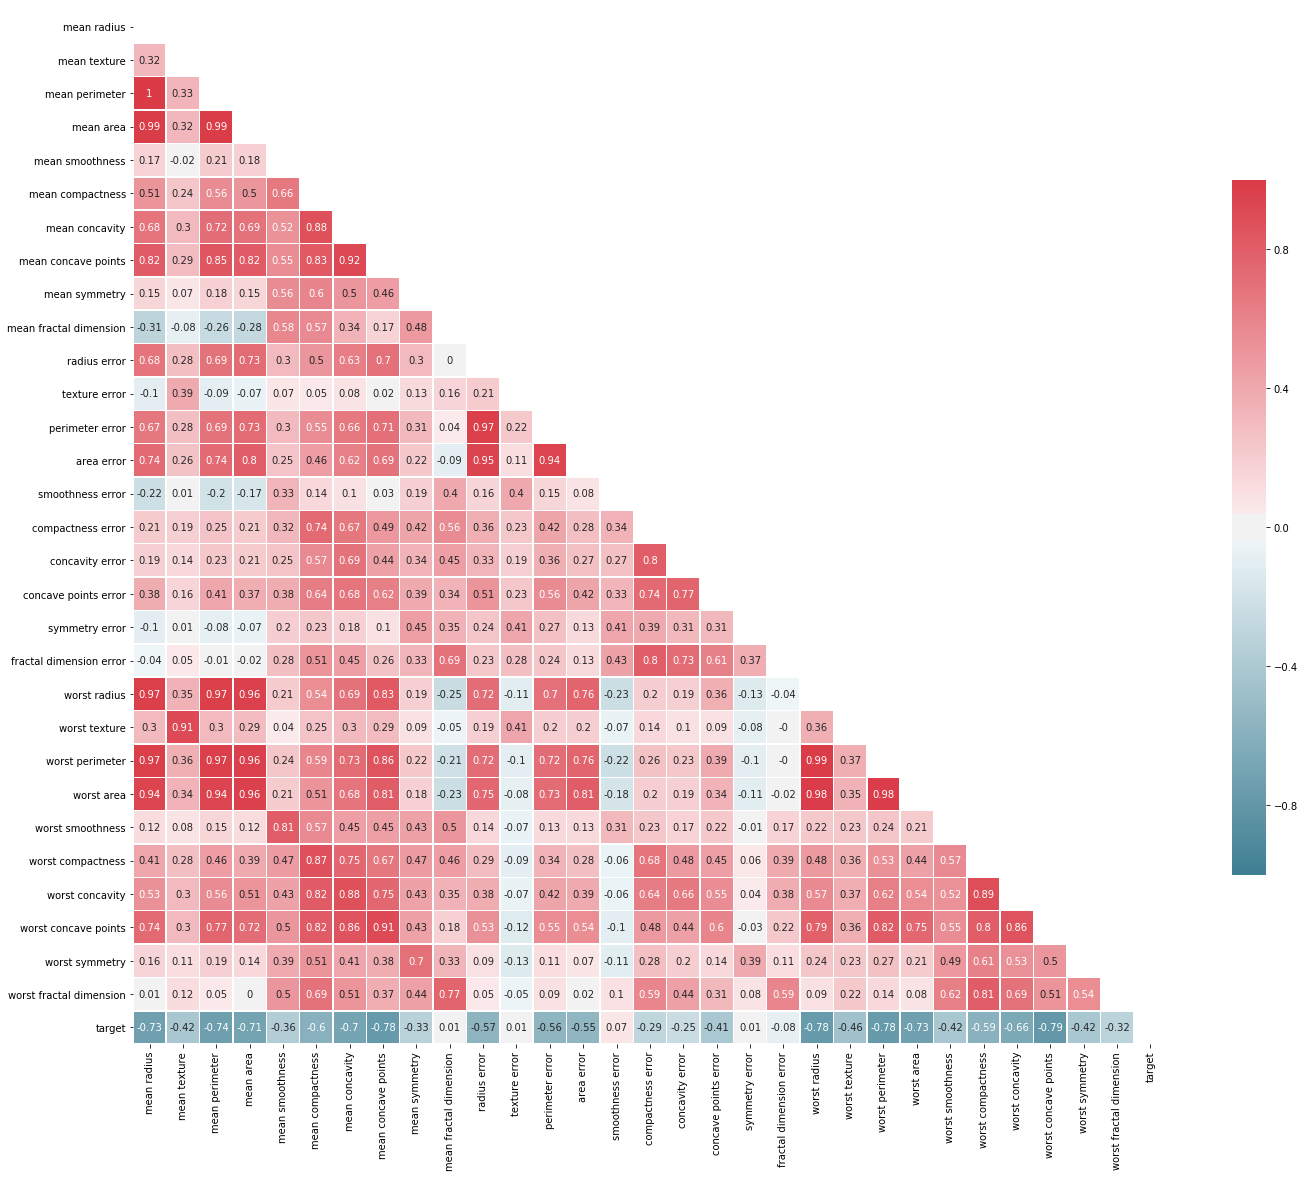

In [3]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [8]:
#identifying variables
X = df.drop(['target'], axis = 1)
y = df["target"]

#splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train.shape

(455, 30)

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       167
   Malignant       1.00      1.00      1.00       288

   micro avg       1.00      1.00      1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



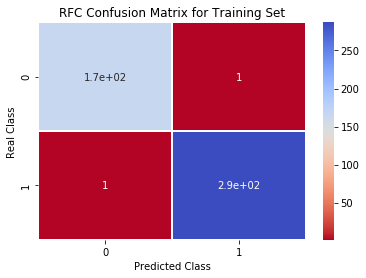

Cross Validation Accuracy Scores: 0.952(+/- 0.06)


In [13]:
#instantiating and fitting default model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_train)

#building confusion matrix
conf_matrix_train_rfc = confusion_matrix(y_train, y_pred_rfc)
#printing classification report
print(classification_report(y_train, y_pred_rfc, target_names=['Benign', 'Malignant']))

#creating heatmap of confusion matrix
sns.heatmap(conf_matrix_train_rfc,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('RFC Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

#printing cross validation average and standard deviation
scores_rfc1 = cross_val_score(rfc, X_train, y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rfc1.mean(), 
                                                                      (scores_rfc1.std()*2)))

*A perfect precision/recall (1.0) indicates overfitting.*

              precision    recall  f1-score   support

      Benign       0.93      0.89      0.91        45
   Malignant       0.93      0.96      0.94        69

   micro avg       0.93      0.93      0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



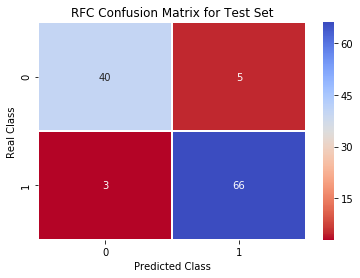

Cross Validation Accuracy Scores: 0.918(+/- 0.18)


In [16]:
y_pred_rfc_test = rfc.predict(X_test)
#building confusion matrix
conf_matrix_test_rfc = confusion_matrix(y_test, y_pred_rfc_test)
#printing classification report
print(classification_report(y_test, y_pred_rfc_test, target_names=['Benign', 'Malignant']))

#creating heatmap of confusion matrix
sns.heatmap(conf_matrix_test_rfc,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('RFC Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

#printing cross validation average and standard deviation
scores_rfc_test = cross_val_score(rfc, X_test, y_test, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rfc_test.mean(), 
                                                                      (scores_rfc_test.std()*2)))

              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99       167
   Malignant       0.99      1.00      1.00       288

   micro avg       1.00      1.00      1.00       455
   macro avg       1.00      0.99      1.00       455
weighted avg       1.00      1.00      1.00       455



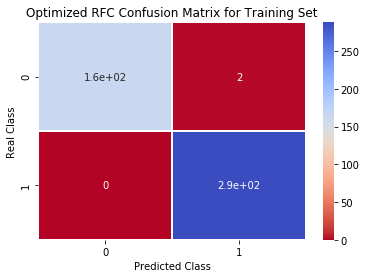

Cross Validation Accuracy Scores: 0.954(+/- 0.05)


In [24]:
params = {'bootstrap': True, 
          'max_depth': 5, 
          'max_features': 'auto', 
          'min_samples_split': 8, 
          'n_estimators': 100}
rfc2 = RandomForestClassifier(**params)
rfc2.fit(X_train, y_train)

y_pred_rfc2 = rfc2.predict(X_train)
#printing classification report
print(classification_report(y_train, y_pred_rfc2, target_names=['Benign', 'Malignant']))

#building confusion matrix
conf_matrix_train_rfc2 = confusion_matrix(y_train, y_pred_rfc2)
#creating heatmap of confusion matrix
sns.heatmap(conf_matrix_train_rfc2,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('Optimized RFC Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_rfc2 = cross_val_score(rfc2, X_train, y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rfc2.mean(), 
                                                                      scores_rfc2.std()*2))

              precision    recall  f1-score   support

      Benign       0.95      0.91      0.93        45
   Malignant       0.94      0.97      0.96        69

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



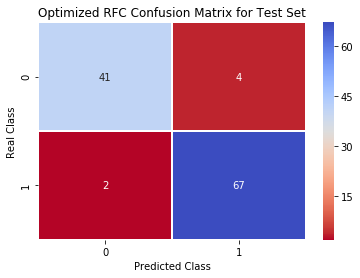

Cross Validation Accuracy Scores: 0.926(+/- 0.19)


In [25]:
y_pred_rfc2_test = rfc2.predict(X_test)
#printing classification report
print(classification_report(y_test, y_pred_rfc2_test, target_names=['Benign', 'Malignant']))

#building confusion matrix
conf_matrix_test_rfc2 = confusion_matrix(y_test, y_pred_rfc2_test)
#creating heatmap of confusion matrix
sns.heatmap(conf_matrix_test_rfc2,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('Optimized RFC Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_rfc2_test = cross_val_score(rfc2, X_test, y_test, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rfc2_test.mean(), 
                                                                      scores_rfc2_test.std()*2))

**PCA**  

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(X_train, y_train)
components_train = pd.DataFrame(pca.transform(X_train))
components_test = pd.DataFrame(pca.transform(X_test))

              precision    recall  f1-score   support

      Benign       1.00      0.94      0.97       167
   Malignant       0.97      1.00      0.98       288

   micro avg       0.98      0.98      0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



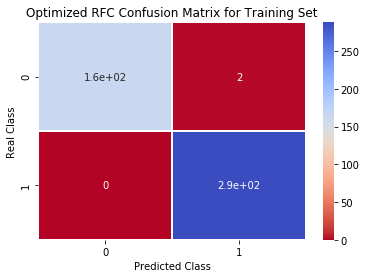

Cross Validation Accuracy Scores: 0.954(+/- 0.05)


In [37]:

rfc3 = RandomForestClassifier(**params)
rfc3.fit(components_train, y_train)

y_pred_rfc3 = rfc3.predict(components_train)
#printing classification report
print(classification_report(y_train, y_pred_rfc3, target_names=['Benign', 'Malignant']))

#building confusion matrix
conf_matrix_train_rfc2 = confusion_matrix(y_train, y_pred_rfc2)
#creating heatmap of confusion matrix
sns.heatmap(conf_matrix_train_rfc2,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('Optimized RFC Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_rfc2 = cross_val_score(rfc2, X_train, y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rfc2.mean(), 
                                                                      scores_rfc2.std()*2))

              precision    recall  f1-score   support

      Benign       0.95      0.91      0.93        45
   Malignant       0.94      0.97      0.96        69

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



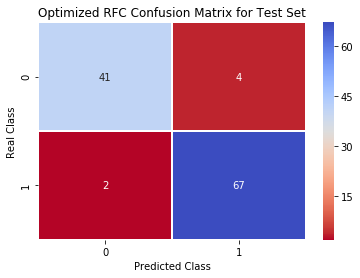

Cross Validation Accuracy Scores: 0.919(+/- 0.17)


In [38]:
y_pred_rfc3_test = rfc3.predict(components_test)
#printing classification report
print(classification_report(y_test, y_pred_rfc3_test, target_names=['Benign', 'Malignant']))

#building confusion matrix
conf_matrix_test_rfc3 = confusion_matrix(y_test, y_pred_rfc3_test)
#creating heatmap of confusion matrix
sns.heatmap(conf_matrix_test_rfc3,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('Optimized RFC Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_rfc3_test = cross_val_score(rfc3, components_test, y_test, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rfc3_test.mean(), 
                                                                      scores_rfc3_test.std()*2))

In [47]:
coef = pd.DataFrame(rfc2.feature_importances_)
coef.index = X_train.columns
coef.sort_values(by=0, ascending=False)

,0
worst concave points,0.174269
worst perimeter,0.144082
worst area,0.138129
mean concave points,0.113312
worst radius,0.090597
mean concavity,0.068223
mean radius,0.033307
mean area,0.032374
area error,0.030661
worst concavity,0.029928


In [48]:
coef2 = pd.DataFrame(rfc3.feature_importances_)
coef2.index = components_train.columns
coef2.sort_values(by=0, ascending=False)

,0
0,0.367028
2,0.128521
1,0.096139
3,0.088810
10,0.044789
8,0.035369
12,0.035273
14,0.023317
5,0.019624
4,0.017951


Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.02631578947368421
Percent Type II errors: 0.017543859649122806
              precision    recall  f1-score   support

      Benign       0.95      0.93      0.94        45
   Malignant       0.96      0.97      0.96        69

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



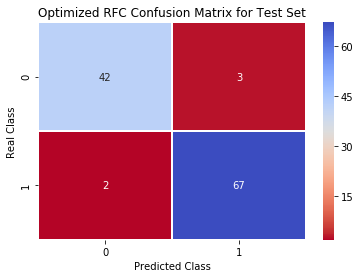

Cross Validation Accuracy Scores: 0.926(+/- 0.17)


In [57]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

y_pred_clf_test = clf.predict(X_test)
#printing classification report
print(classification_report(y_test, y_pred_clf_test, target_names=['Benign', 'Malignant']))

#building confusion matrix
conf_matrix_test_clf = confusion_matrix(y_test, y_pred_clf_test)
#creating heatmap of confusion matrix
sns.heatmap(conf_matrix_test_clf,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('Optimized RFC Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_clf_test = cross_val_score(clf, X_test, y_test, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_clf_test.mean(), 
                                                                      scores_clf_test.std()*2))

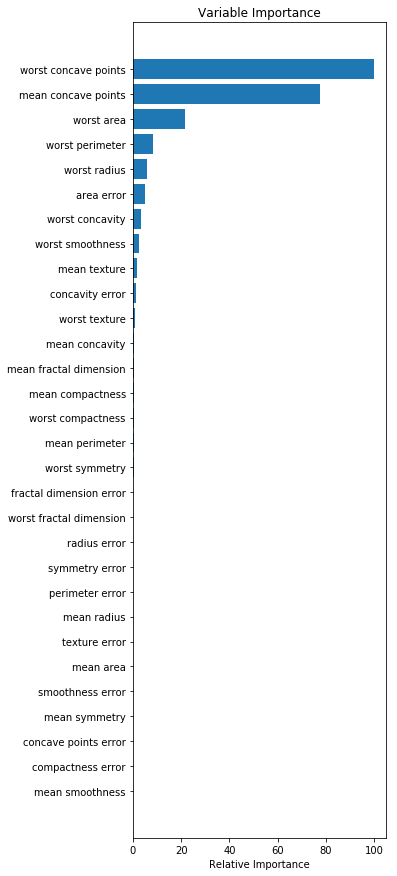

In [58]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10,15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()